<a href="https://colab.research.google.com/github/ShahadAljohany/Project-AI-Employee-Performance-Evaluation/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# project CPCS 433 - Topics AI


```
# Employee Performance Evaluation
Group_5
```



# Importing Libraries

In [28]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

# **Load The Dataset**

 2) Load the Dataset

In [29]:
#  Load the Dataset
df = pd.read_csv('/content/Extended_Employee_Performance_and_Productivity_Data.csv')

In [30]:
# Checking dataset shape and first five records
print(" Shape:", df.shape)
df.head()


 Shape: (100000, 20)


,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [31]:
# Display dataset summary and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [32]:
# View the loaded dataset
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,False
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10,False


# Preprocessing Dataset

1. Missing Values

In [33]:
# Checking for Missing Values
print("Checking for Missing Values in the Dataset:")
df.isnull().sum()

Checking for Missing Values in the Dataset:


,0
Employee_ID,0
Department,0
Gender,0
Age,0
Job_Title,0
Hire_Date,0
Years_At_Company,0
Education_Level,0
Performance_Score,0
Monthly_Salary,0


2. Duplicated Values

In [34]:
# Checking For Duplicated Values
print('Number Of Duplicated Values In The Dataset: ', df.duplicated().sum())

Number Of Duplicated Values In The Dataset:  0


3. Handling Categorical Columns (Encoding)

In [35]:
# Encoding Categorical Columns (Convert text to numbers)

# Get categorical columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical Columns To Encode:", cat_cols)

# Encode categorical columns using LabelEncoder
encoders = {}
for c in cat_cols:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c].astype(str))
    encoders[c] = le

print("\nAll Categorical Columns Have Been Encoded Successfully. ")


Categorical Columns To Encode: ['Department', 'Gender', 'Job_Title', 'Hire_Date', 'Education_Level']

All Categorical Columns Have Been Encoded Successfully. 


4. Extracting Useful Information and Removing Unnecessary Columns


In [36]:
# Extract useful information from the hire date

# Ensure the column is in datetime format
df["Hire_Date"] = pd.to_datetime(df["Hire_Date"], errors="coerce")
# Reference date
reference_date = pd.to_datetime("2024-12-31")
# Calculate years since hire
df["Years_Since_Hire"] = (reference_date - df["Hire_Date"]).dt.days / 365

# Remove unnecessary columns after feature extraction
df = df.drop(columns=["Hire_Date", "Employee_ID"], errors="ignore")

print("Created 'Years_Since_Hire' and removed original columns.")


Created 'Years_Since_Hire' and removed original columns.


5. Class Balancing



In [46]:
# Check the distribution of the target variable
print("Class Distribution in 'Performance_Score':")
df["Performance_Score"].value_counts().sort_index()

Class Distribution in 'Performance_Score':


,count
Performance_Score,
1,20120
2,20013
3,19999
4,19940
5,19928


# Training the model

In [38]:
# Split the values of independent features (X) and dependent target (y)
X = df.drop(columns=["Performance_Score"])
y = df["Performance_Score"]

# Split data using 70% train, 10% validation, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp)

print(f"Shapes → Train: {X_train.shape} | Val: {X_val.shape} | Test: {X_test.shape}")



Shapes → Train: (70000, 18) | Val: (10000, 18) | Test: (20000, 18)


# Testing the model

# Decision Tree

1. fit + accuracy

In [39]:
print("Decision Tree")
print("-"*40)

# Create and fit the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=10)
dt_model.fit(X_train, y_train)

# Make predictions
y_train_pred = dt_model.predict(X_train)
y_val_pred   = dt_model.predict(X_val)
y_test_pred  = dt_model.predict(X_test)

# Calculate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc   = accuracy_score(y_val, y_val_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc*100:.2f}%")
print(f"Val   Accuracy: {val_acc*100:.2f}%")
print(f"Test  Accuracy: {test_acc*100:.2f}%")


Decision Tree
----------------------------------------
Train Accuracy: 77.37%
Val   Accuracy: 76.95%
Test  Accuracy: 76.78%


2. Model Performance

In [40]:
# --- Model Performance ---
print("\nMODEL PERFORMANCE (Test) — weighted")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall   :", recall_score(y_test, y_test_pred, average='weighted'))
print("F1-Score :", f1_score(y_test, y_test_pred, average='weighted'))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))


MODEL PERFORMANCE (Test) — weighted
Accuracy : 0.7678
Precision: 0.8489563722229614
Recall   : 0.7678
F1-Score : 0.7758213983960514

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.54      1.00      0.70      4024
           2       1.00      0.56      0.72      4003
           3       0.71      0.71      0.71      4000
           4       1.00      0.71      0.83      3988
           5       1.00      0.86      0.92      3985

    accuracy                           0.77     20000
   macro avg       0.85      0.77      0.78     20000
weighted avg       0.85      0.77      0.78     20000



3. Confusion Matrix

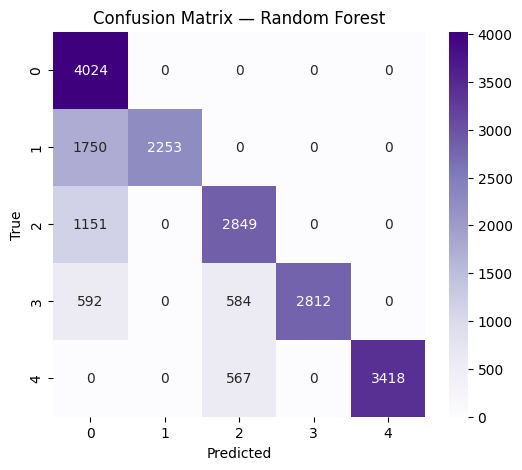

In [41]:
# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Random Forest

1. fit + accuracy

In [42]:
print("Random Forest")
print("-"*40)

# Create and fit the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict on each dataset
y_train_pred = rf_model.predict(X_train)
y_val_pred   = rf_model.predict(X_val)
y_test_pred  = rf_model.predict(X_test)

# Calculate accuracy manually
train_acc = accuracy_score(y_train, y_train_pred)
val_acc   = accuracy_score(y_val, y_val_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

# Print accuracies in a simple readable way
print("Train Accuracy: %s" % "{0:.3%}".format(train_acc))
print("Val   Accuracy: %s" % "{0:.3%}".format(val_acc))
print("Test  Accuracy: %s" % "{0:.3%}".format(test_acc))



Random Forest
----------------------------------------
Train Accuracy: 100.000%
Val   Accuracy: 99.970%
Test  Accuracy: 99.945%


2. Model Performance

In [43]:
#Model Performance
print("MODEL PERFORMANCE (Test) — weighted")
print("Accuracy :", metrics.accuracy_score(y_test, y_test_pred))
print("Precision:", metrics.precision_score(y_test, y_test_pred, average='weighted'))
print("Recall   :", metrics.recall_score(y_test, y_test_pred, average='weighted'))
print("F1-Score :", metrics.f1_score(y_test, y_test_pred, average='weighted'))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

MODEL PERFORMANCE (Test) — weighted
Accuracy : 0.99945
Precision: 0.999450124054612
Recall   : 0.99945
F1-Score : 0.9994499996318196

Classification Report (Test):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4024
           2       1.00      1.00      1.00      4003
           3       1.00      1.00      1.00      4000
           4       1.00      1.00      1.00      3988
           5       1.00      1.00      1.00      3985

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



3. Confusion Matrix

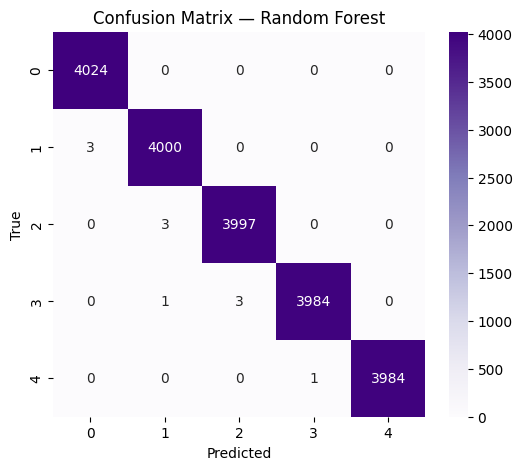

In [44]:
# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

4. Features Importance

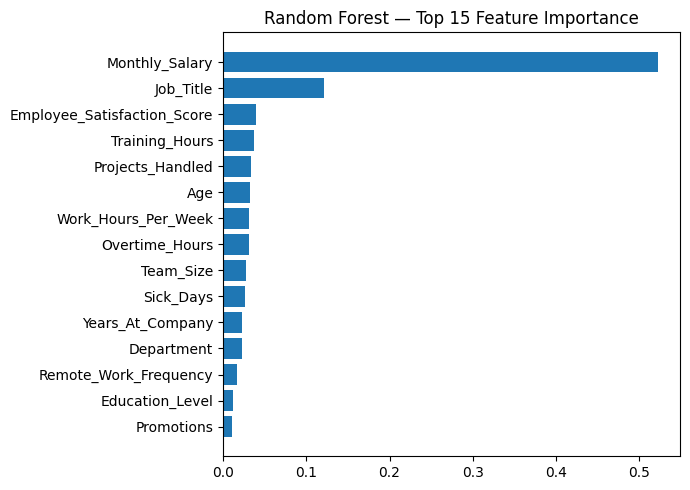

In [45]:
# Show Top 15 Features Importance
importances = rf_model.feature_importances_
feat_names = np.array(X.columns)
idx = np.argsort(importances)[::-1][:15]

plt.figure(figsize=(7,5))
plt.barh(feat_names[idx][::-1], importances[idx][::-1])
plt.title("Random Forest — Top 15 Feature Importance")
plt.tight_layout()
plt.show()
